# [MO443] Trabalho de Alinhamento de Documentos - Trabalho 03

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Implementar algoritmos de alinhamento automático de imagem de documentos

## Introdução

Um problema recorrente na análise de documentos advém do desalinhamento do texto, ou seja, quando ocorre o posicionamento da folha com uma inclinação diferente do digitalizador. Diante disso, é fundamental corrigir este problema para que sistemas de reconhecimento óptico de caracteres possam funcionar adequadamente.

Neste trabalho será explorado duas abordagens para corrigir o desalinhamento do texto. A primeira consiste na técnica de projeção horizontal e a outra na transformada de Hough. 

## Técnica Baseada em Projeção Horizontal

Esta técnica consiste variar o ângulo e projetar a quantidade de pixels pretos em cada linha do texto. O ângulo escolhido é aquele que otimiza uma certa função objetivo calculada sobre a projeção horizontal. 

Dada uma imagem que contém um texto desalinhado, o primeiro procedimento realizado será a binarização seguido da aplicação do efeito negativo na imagem, pois assim não haverá problemas com os diversos valores presentes na escala de cinza e também com o fundo preto que ficará aparente ao iniciar o processo de rotação, influenciando na contagem dos pixels pretos que pertencem aos caracteres do texto. 

O algoritmo para detectar a inclinação inicia-se percorrendo o eixo de angulação de $0$ a $180$, em que é realizado uma rotação com um determinado ângulo $\theta$ seguido do cálculo da projeção horizontal, que no caso, será a quantidade de pixels brancos, devido ao efeito negativo aplicado, presentes em cada linha da imagem. O melhor ângulo para rotacionar a imagem será aquele que produziu a menor quantidade de linhas com pixels pertencentes aos caracteres (iguais a 1), ou seja, que a maioria das linhas da imagem pertençam ao fundo. 

Nas células a seguir encontra-se os procedimentos mencionados anteriormente. Na primeira célula é realizada as importações das bibliotecas necessárias. Na célula subjacente, encontra-se três funções auxiliares, sendo duas que realizam a plotagem das imagens por intermédio da biblioteca *Matplotlib* e a terceira função realiza o procedimento de rotação de uma imagem com base em um ângulo. Por fim, a célula seguinte contém a função de detecção do ângulo de inclinação do texto via projeção horizontal. Nesta célula contém todo o algoritmo mencionado, iniciando com o processamento da imagem (binarização e aplicação do efeito negativo) seguido da descoberta do ângulo com a projeção horizontal de maneira iterativa e com base na quantidade de linhas com pixels pertencentes aos caracteres do texto.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
def produzir_subimagem(subimagem, i, j, imagem, color_map = None, titulo = None):
    if i == 1:
        subimagem[j].imshow(imagem, cmap=color_map)
        subimagem[j].set_title(titulo)
        subimagem[j].axis('off')
    else:
        if color_map is None:
            subimagem[i][j].imshow(imagem)
        else:
            subimagem[i][j].imshow(imagem, cmap=color_map)
        subimagem[i][j].set_title(titulo)
        subimagem[i][j].axis('off')
        

def rotacionar_imagem(imagem: np.ndarray, angulo: int):
    linhas, colunas = imagem.shape[0], imagem.shape[1]
    centro = (colunas//2, linhas//2)
    rotacao = cv2.getRotationMatrix2D(centro, angulo, 1.0)
    img_rotacionada = cv2.warpAffine(imagem, rotacao, (colunas, linhas))
    return img_rotacionada

In [14]:
def detectar_inclinacao_projecao_horizontal(imagem: np.ndarray):
    
    linhas, colunas = imagem.shape[0], imagem.shape[1]
    
    # Binarização da imagem por meio de um limiar
    limiar = 200
    img_binaria = np.zeros((linhas, colunas), dtype=np.uint8)
    img_binaria = np.where(imagem > limiar, 1, 0)
    
    # Aplicação do efeito negativo na imagem
    img_negativa = np.zeros((linhas, colunas), dtype=np.uint8)
    img_negativa = 1 - img_binaria
    
    # Conversão de tipo para correto funcionamento na função de rotação
    img_binaria = img_binaria.astype(np.uint8)
    img_negativa = img_negativa.astype(np.uint8)
    
    # Algoritmo de detecção de inclinação
    melhor_angulo = -180
    melhor_projecao = np.inf

    for angulo in range(0,180):
        for sinal in range(-1, 2, 2):                                           # sinal -1 ou 1 -> evitar problemas de imagem virada de cabeça para baixo      
            # Rotaciona a imagem negativa com base num determinado ângulo
            img_rotacionada = rotacionar_imagem(img_negativa, angulo*sinal)     
            
            # Determina a projeção horizontal da imagem rotacionada
            projecao_horizontal = np.zeros((linhas), dtype=np.uint8)
            for i in range(linhas):
                projecao_horizontal[i] = np.sum(np.where(img_rotacionada[i] == 1, img_rotacionada[i], 0))
            
            # Realiza a verificação para ver se vai alterar o ângulo ou manter o mesmo     
            qtd_linhas_nao_zeradas = np.sum(np.where(projecao_horizontal > 0, 1, 0))
            if qtd_linhas_nao_zeradas < melhor_projecao:
                melhor_projecao = qtd_linhas_nao_zeradas
                melhor_angulo = angulo*sinal
                
    return melhor_angulo

In [ ]:
# Carregamento das imagens
img1 = cv2.imread('neg_4.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('neg_28.png', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('pos_24.png', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('pos_41.png', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('sample1.png', cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('sample2.png', cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('partitura.png', cv2.IMREAD_GRAYSCALE)
imagens = [img1, img2, img3, img4, img5, img6, img7]

angulo1 = detectar_inclinacao_projecao_horizontal(img1)
angulo2 = detectar_inclinacao_projecao_horizontal(img2)
angulo3 = detectar_inclinacao_projecao_horizontal(img3)
angulo4 = detectar_inclinacao_projecao_horizontal(img4)
angulo5 = detectar_inclinacao_projecao_horizontal(img5)
angulo6 = detectar_inclinacao_projecao_horizontal(img6)
angulo7 = detectar_inclinacao_projecao_horizontal(img7)
angulos = [angulo1, angulo2, angulo3, angulo4, angulo5, angulo6, angulo7]

fig, subimagem = plt.subplots(7, 2, figsize=(15,8))
aux=0
for i in range(0,7):
    for j in range(0,2):
        produzir_subimagem(subimagem, i, j, imagens[aux], 'gray', )
        aux += 1
plt.show()


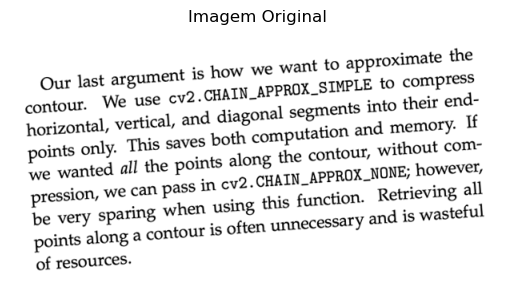

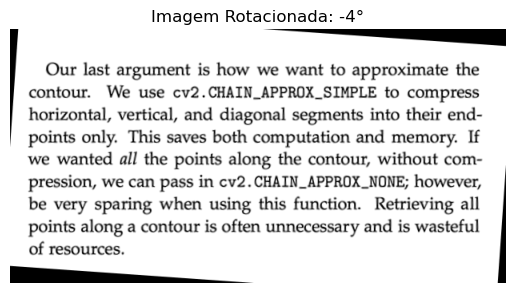

In [22]:
img = cv2.imread('neg_4.png', cv2.IMREAD_GRAYSCALE)
angulo = detectar_inclinacao_projecao_horizontal(img)
mostrar_imagem(img, 'Imagem Original', 'gray')
mostrar_imagem(rotacionar_imagem(img, angulo), f'Imagem Rotacionada: {angulo}°', 'gray')

In [ ]:
img = cv2.imread('pos_41.png', cv2.IMREAD_GRAYSCALE) 
#img = cv2.imread('neg_28.png', cv2.CHAIN_APPROX_SIMPLE) 
mostrar_imagem(img, 'Imagem Original', 'gray')

linhas = img.shape[0]
colunas = img.shape[1]

print('Linhas: ', linhas)
print('Colunas: ', colunas)

In [ ]:
# Binarização da imagem 
limiar = 200
img_bin = np.zeros((linhas, colunas), dtype=np.uint8)
img_bin = np.where(img > limiar, 1, 0)

mostrar_imagem(img_bin, 'Imagem Binária', 'gray')

# Imagem Negativa
img_neg = np.zeros((linhas, colunas), dtype=np.uint8)
img_neg = 1 - img_bin
mostrar_imagem(img_neg, 'Imagem Negativa', 'gray')

img_neg = img_neg.astype(np.uint8)
img_bin = img_bin.astype(np.uint8)

print('Tipo da imagem:', type(img))
print('Tipo dos elementos:', img.dtype)
print('Tipo da imagem:', type(img_neg))
print('Tipo dos elementos:', img_neg.dtype)

In [ ]:
img_rotacionada = rotacionar_imagem(img_neg, 41)
mostrar_imagem(img_rotacionada, 'Imagem Rotacionada', 'gray')

In [ ]:
melhor_angulo = -180
melhor_projecao = np.inf

for angulo in range(0,180):
    
    for sinal in range(-1, 2, 2):
        centro = (colunas//2, linhas//2)
        rotacao = cv2.getRotationMatrix2D(centro, sinal*angulo, 1) #
        img_rotacionada = cv2.warpAffine(img_neg, rotacao, (colunas, linhas))
        
        projecao_horizontal = np.zeros((linhas), dtype=np.uint8)
        for i in range(linhas):
            projecao_horizontal[i] = np.sum(np.where(img_rotacionada[i] == 1, img_rotacionada[i], 0))
            
        qtd_linhas_nao_zeradas = np.sum(np.where(projecao_horizontal > 0, 1, 0))
        if qtd_linhas_nao_zeradas < melhor_projecao:
            melhor_projecao = qtd_linhas_nao_zeradas
            melhor_angulo = angulo*sinal

print('Melhor angulo:', melhor_angulo)

centro = (colunas//2, linhas//2)
rotacao = cv2.getRotationMatrix2D(centro, melhor_angulo, 1) #
img_rotacionada = cv2.warpAffine(img_neg, rotacao, (colunas, linhas))

# print('Angulo de rotação:', angulo)
mostrar_imagem(img_rotacionada, 'Imagem Rotacionada', 'gray')
mostrar_imagem(img, 'Imagem Original', 'gray')

In [ ]:
img = cv2.imread('neg_28.png', cv2.CHAIN_APPROX_SIMPLE) 
mostrar_imagem(img, 'Imagem Original', 'gray')

In [ ]:
# construção da projeção horizontal
projecao_horizontal = np.zeros(linhas)
indice = np.zeros(linhas)

for i in range(linhas):
    for j in range(colunas):
        if img[i, j] == 0:
            projecao_horizontal[i] += 1
            indice[i] = i

plt.barh(indice, projecao_horizontal)
plt.title('Projeção Horizontal')
plt.show()


In [ ]:
# rotacionar a imagem em torno do centro
angulo = -28
centro = (colunas//2, linhas//2)
rotacao = cv2.getRotationMatrix2D(centro, angulo, 1)
img_rotacionada = cv2.warpAffine(img, rotacao, (colunas, linhas))
mostrar_imagem(img_rotacionada, 'Imagem Rotacionada', 'gray')


In [ ]:
# Aplicar detecção de bordas na imagem
img_borda = cv2.Canny(img, 50, 150, apertureSize=5)
mostrar_imagem(img_borda, 'Detecção de Bordas', 'gray')

In [ ]:
retas = cv2.HoughLinesP(img_borda, 1, np.pi/180, 200)
print(retas)
print(retas.shape)